# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import seaborn as sns
import random as rd
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
df = clean_hospital_read_df

/anaconda3/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


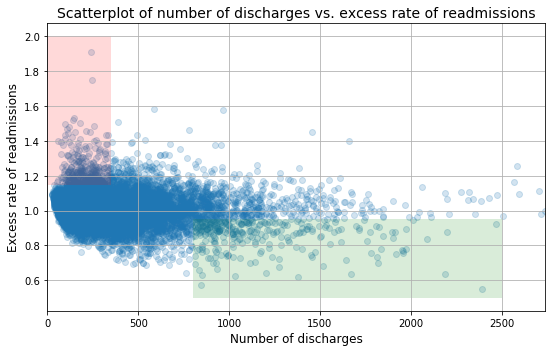

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [18]:
def bs_rep_1d(data, func, ssize):
    """ Bootstrap function. Resamples input data and applies a function (e.g. mean) """
    bs = np.random.choice(data,ssize)
    return func(bs)

def draw_bs_reps(data,func,size,ssize):
    """ Collects many boostrapped samples """
    return np.array([bs_rep_1d(data,func,ssize) for _ in range(size)])

def ecdf(data):
    """Calculate the x,y ECDF of input data"""
    n = len(data)
    x = np.sort(data)
    y = np.array([float(i) for i in range(1,n+1)]) / n
    return x, y

In [6]:
df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


[0, 3000, 0.6, 1.6]

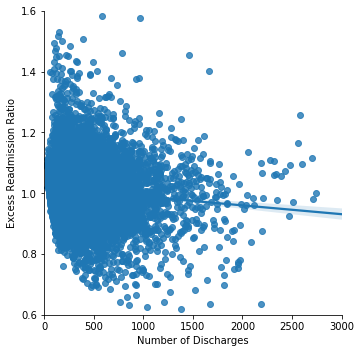

In [140]:
sns.lmplot(y='Excess Readmission Ratio',x='Number of Discharges',data=df)
plt.axis([0,3000,0.6,1.6])

<div class="span5 alert alert-success">
<p>There does seem to be a slight negative correlation between Excess Readmission Ratio (ERR) and Number of Discharges (NOD), based on the plot above. But it's unclear if the trend is significant without doing some additional statistical tests.</p>
</div>

In [141]:
# Create "isbig" column, which labels the row as small, medium, or big. 
# Then, isolate the data for each size category.
df['isbig'] = 'big'
df.loc[df['Number of Discharges']<1000,'isbig']='medium'
df.loc[df['Number of Discharges']<100,'isbig']='small'
med = df[df.isbig=='medium']
small = df[df.isbig=='small']
big = df[df.isbig=='big']

In [142]:
# Show stats grouped by size group.
df.groupby('isbig')['Excess Readmission Ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
isbig,,,,,,,,
big,464.0,0.978334,0.119878,0.5495,0.90805,0.98600,1.057100,1.4543
medium,9845.0,1.007055,0.093422,0.5748,0.94900,1.00140,1.059600,1.9095
small,1188.0,1.022618,0.057979,0.8935,0.98490,1.01775,1.052925,1.4953


<div class="span5 alert alert-success">
<p>The mean ERR follows the same negative correlation with size. </p>
</div>

In [143]:
# Remove NaNs
small = small[~pd.isna(small['Excess Readmission Ratio'])]
big = big[~pd.isna(big['Excess Readmission Ratio'])]
med = med[~pd.isna(med['Excess Readmission Ratio'])]
smallR = small['Excess Readmission Ratio']
bigR = big['Excess Readmission Ratio']
medR = med['Excess Readmission Ratio']

In [147]:
# Get mean, standard deviation, and size.
dfsmean = smallR.mean()
dfbmean = bigR.mean()
dfmmean = medR.mean()
dfsstd = smallR.std()
dfbstd = bigR.std()
dfmstd = medR.std()
dfsn = len(dfsmall)
dfbn = len(dfbig)

Text(0,0.5,'Standard Deviation of ERR')

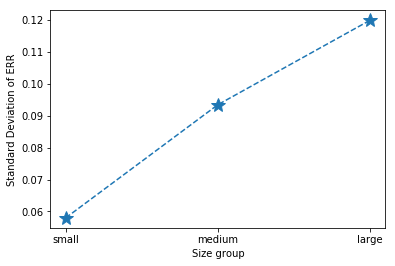

In [161]:
# Plot of standard deviation vs. size group.
plt.plot(['small','medium','large'],[dfsstd,dfmstd,dfbstd],linestyle='--',marker='*',markersize=15)
plt.xlabel('Size group')
plt.ylabel('Standard Deviation of ERR')

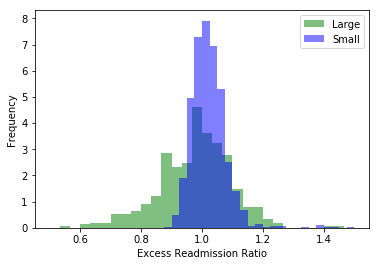

In [134]:
# Histogram of ERR, for Large and Small hospitals.
plt.hist(dfbig['Excess Readmission Ratio'],bins = 30,range=[0.5,1.5],color='green',alpha=0.5,density=True)
plt.hist(dfsmall['Excess Readmission Ratio'],bins = 40,range=[0.5,1.5],color='blue',alpha=0.5,density=True)
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('Frequency')
plt.legend(['Large','Small'])
plt.show()

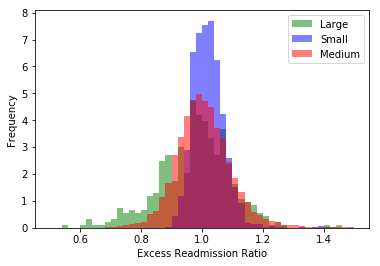

In [145]:
# Histogram of ERR, for Large, Medium, and Small hospitals.
plt.hist(big['Excess Readmission Ratio'],bins = 50,range=[0.5,1.5],color='green',alpha=0.5,density=True)
plt.hist(small['Excess Readmission Ratio'],bins = 50,range=[0.5,1.5],color='blue',alpha=0.5,density=True)
plt.hist(med['Excess Readmission Ratio'],bins = 50,range=[0.5,1.5],color='red',alpha=0.5,density=True)
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('Frequency')
plt.legend(['Large','Small','Medium'])
plt.show()

<div class="span5 alert alert-success">
<p>You can see from the histograms and the plot of standard deviation above that there is greater spread in the distribution for larger hospitals, even though smaller hospitals have a higher average. So, while a smaller hospital may be more likely to have an ERR greater than 1, a larger hospital seems to be more likely to have an ERR as high as 1.2. </p>
</div>

In [135]:
# Create ECDFs for each group.
sx, sy = ecdf(smallR)
bx, by = ecdf(bigR)
mx, my = ecdf(medR)

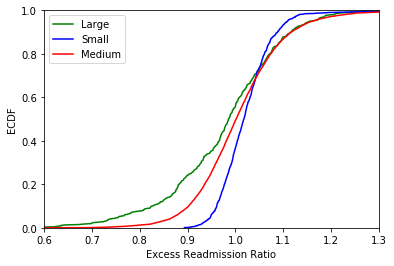

In [162]:
# Plot ECDFs
plt.plot(bx,by,color='green')
plt.plot(sx,sy,color='blue')
plt.plot(mx,my,color='red')
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('ECDF')
plt.legend(['Large','Small','Medium'])
plt.axis([0.6,1.3,0,1])
plt.show()

[-1, 3, 0.8, 1.3]

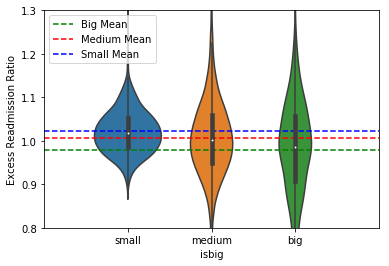

In [138]:
# Violin plot for each size group.
plt.plot([-1,4],[0.978,0.978],color='green',linestyle='--')
plt.plot([-1,4],[1.007,1.007],color='red',linestyle='--')
plt.plot([-1,4],[1.023,1.023],color='blue',linestyle='--')
sns.violinplot(x='isbig',y='Excess Readmission Ratio',data=df)
plt.legend(['Big Mean','Medium Mean','Small Mean'])
plt.axis([-1,3,0.8,1.3])

In [176]:
# Chance of small hospital having ERR > 1
float(np.sum(smallR>1)) / len(smallR)

0.6321548821548821

In [177]:
# Chance of large hospital having ERR > 1
float(np.sum(bigR>1)) / len(bigR)

0.44396551724137934

In [174]:
# Chance of small hospital having ERR > 1.1
float(np.sum(smallR>1.1)) / len(smallR)

0.06734006734006734

In [175]:
# Chance of large hospital having ERR > 1.1
float(np.sum(bigR>1.1)) / len(bigR)

0.12284482758620689

<div class="span5 alert alert-success">
<p>It's now clear that while a smaller hospital may be more likely to have an ERR greater than 1 (small 63% vs. large 44%), a larger hospital is more likely to have an ERR higher than 1.1 (small 6.7% vs. large 12.3%). </p>
</div>

<div class="span5 alert alert-success">
<p> We will now do a bootstrap resampling test to see if the difference between groups could have happened by chance. We'll use a significance of alpha = 0.01. </p>
</div>

In [179]:
# Using the combined observations, extract random samples for each subset population.
# Calculate the difference in means, and repeat 10,000 times, storing in 'tstat' variable.
MW = pd.concat([smallR,bigR])
lenm = len(dfbig)
N = 10000
tstat = np.empty(N)
for i in range(N):
    MWp = np.random.permutation(MW)
    Mp = MWp[:lenm]
    Wp = MWp[lenm:]
    tstat[i] = np.mean(Mp) - np.mean(Wp)

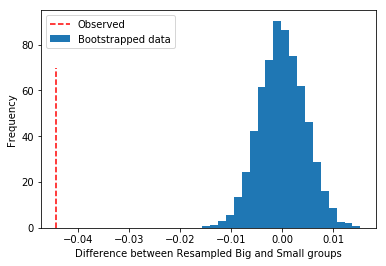

In [180]:
plt.hist(tstat,bins=20,density=True)
plt.plot([dfbmean-dfsmean,dfbmean-dfsmean],[0,70],linestyle='--',color='red')
plt.xlabel('Difference between Resampled Big and Small groups')
plt.ylabel('Frequency')
plt.legend(['Observed','Bootstrapped data'])

In [96]:
pvalue = np.sum(tstat<=dfbmean-dfsmean) / len(tstat)
pvalue

0

<div class="span5 alert alert-success">
<p>The p-value is 0, which means that it is extremely unlikely that the difference in mean ERR between the large and small hospitals could have happened by chance.</p>
</div>

In [181]:
# Calculate z.
z = (dfbmean - dfsmean) / np.sqrt(((dfsstd ** 2)/ dfsn) + ((dfbstd ** 2)/ dfbn))
z

-7.609476465302526

<div class="span5 alert alert-success">
<p>Calculating z = -7.6 for the ERR for the large and small hospitals, we again see that the difference is extremely unlikely to have occurred by chance. </p>
</div>

<div class="span5 alert alert-success">
<p>Overall, I partially disagree with the conclusions and recommendations in the Preliminary Report. Yes, the smaller hospitals have a higher mean ERR, but that doesn't take into account the whole story. Larger hospitals are about twice as likely to have an ERR higher than 1.1. This means that smaller hospitals appear to be a bit more consistent, while larger hospitals' ERR vary more widely.  </p>
</div>